# **BigMart Store Sales Prediction**

### **Problem Statement**

 Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. In a data warehouse, these data stores hold a significant amount of consumer information and particular item details. By mining the data store from the data warehouse, more anomalies and common patterns can be discovered.

### **Approach**

The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

### **Result**

Build a solution that should able to predict the sales of the different stores of Big Mart according to the provided dataset.

### **Dataset**

https://www.kaggle.com/datasets/ahmadrezagholami2001/bigmart-sales-dataset

### **Data Description**

**Item_Identifier**:           Unique product ID

**Item_Weight**:               Weight of product

**Item_Fat_Content**:          Whether the product is low fat or not

**Item_Visibility**:           The % of total display area of all products in a store allocated to the particular product

**Item_Type**:                 The category to which the product belongs

**Item_MRP**:                  Maximum Retail Price (list price) of the product

**Outlet_Identifier**:         Unique store ID

**Outlet_Establishment_Year**: The year in which store was established

**Outlet_Size**:               The size of the store in terms of ground area covered

**Outlet_Location_Type**:      The type of city in which the store is located

**Outlet_Type**:               Whether the outlet is just a grocery store or some sort of supermarket

**Item_Outlet_Sales**:         Sales of the product in the particulat store. This is the outcome variable to be predicted.

### **What's in this Notebook**

This notebook contains the Data Exploration, Data Wrangling, Data Cleaning and Feature Engineering of the dataset so that the data becomes suitable to fit any machine learning techniques and algorithms.

### **Let's Started**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Now we will look into some basic stats of the dataset

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
print('No of rows in the dataset :{}'.format(df.shape[0]))
print('No of columns in the dataset :{}'.format(df.shape[1]))

No of rows in the dataset :8523
No of columns in the dataset :12


In [6]:
df=df.drop(['Outlet_Identifier'],axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
## Checking if there are any null values present

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

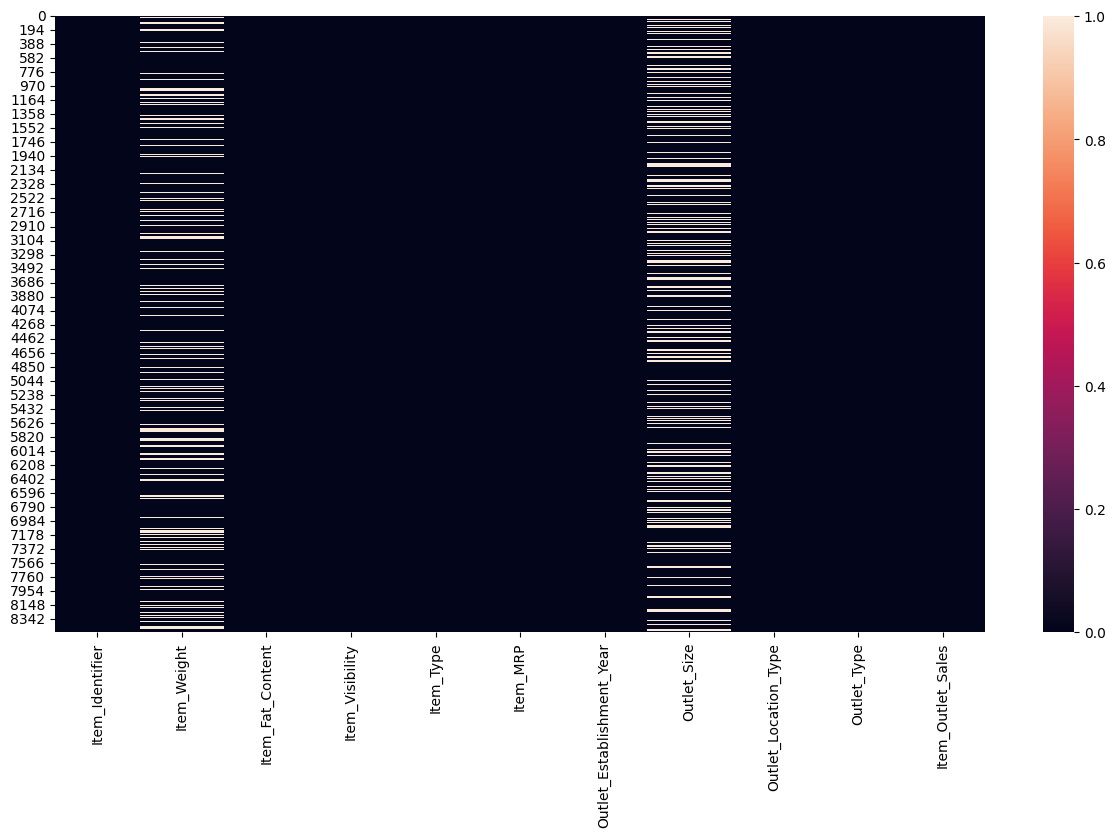

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

There are 1463 null values in Item Weight column and 2410 null values in Outlet Size column

In [9]:
## We will compute outlet establishment age as it is more impactful than outlet establishment year

df['Outlet_Establishment_Age']=df['Outlet_Establishment_Year'].apply(lambda x:2024-x)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishment_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,37


### **Exploratory Data Analysis (EDA)**

Now We'll deep dive into the hidden insights of the dataset through EDA

#### Univariate Analysis for Numerical Variables

/var/folders/q0/f4x24yyj5pgfbphby1zl6yxr0000gn/T/ipykernel_3809/2152547823.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Item_Weight'],palette='muted')


Text(0.5, 1.0, 'Violinplot of Item Weight')

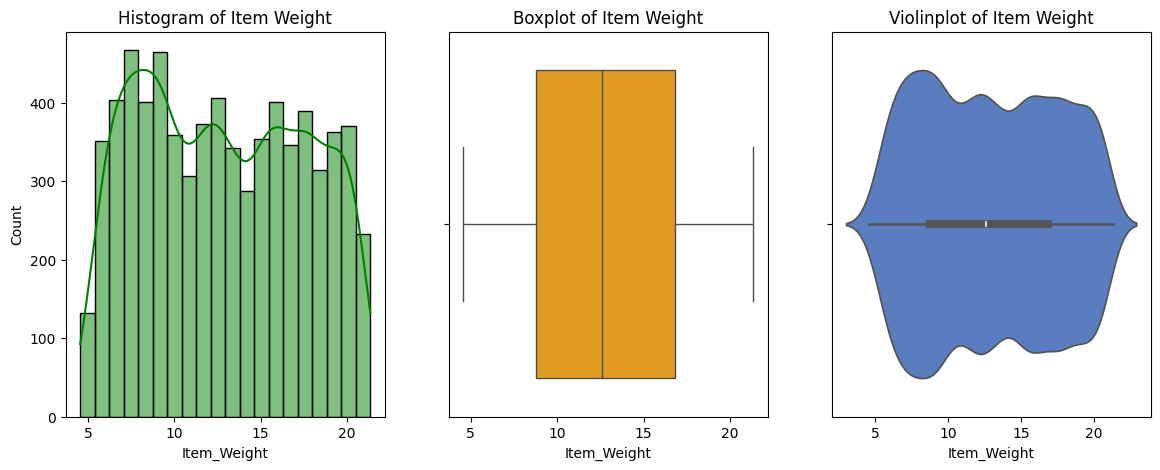

In [10]:
plt.figure(figsize=(14,5))

# Histogram plot for Item Weight
plt.subplot(1,3,1)
sns.histplot(data=df,x='Item_Weight',kde=True,color='green')
plt.title('Histogram of Item Weight')

# Boxplot for Item Weight
plt.subplot(1,3,2)
sns.boxplot(data=df,x='Item_Weight',color='orange')
plt.title('Boxplot of Item Weight')

# Violinplot of Item Weight
plt.subplot(1,3,3)
sns.violinplot(x=df['Item_Weight'],palette='muted')
plt.title('Violinplot of Item Weight')

/var/folders/q0/f4x24yyj5pgfbphby1zl6yxr0000gn/T/ipykernel_3809/2433728766.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Item_Visibility'],palette='Set2')


Text(0.5, 1.0, 'Violinplot of Item Visibility')

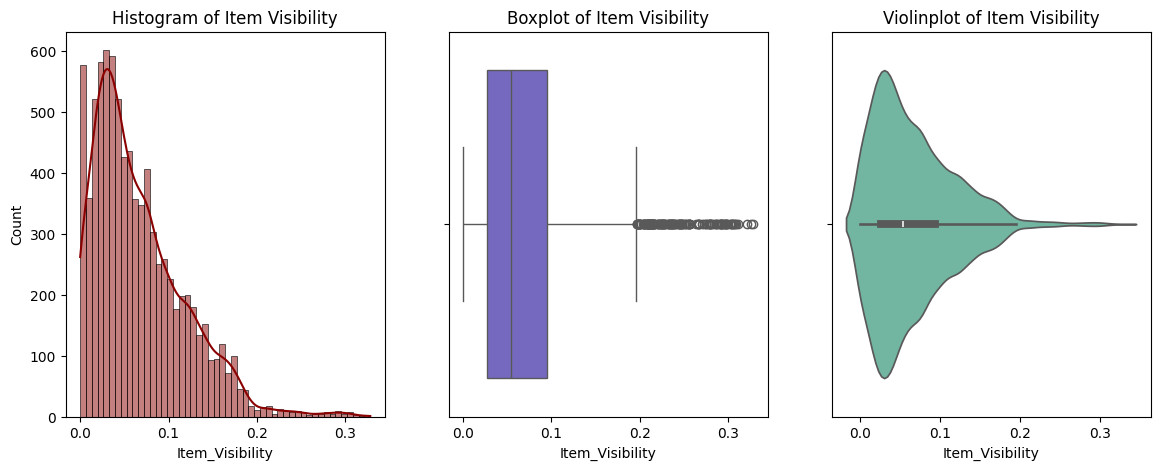

In [11]:
plt.figure(figsize=(14,5))

# Histogram plot for Item Visibility
plt.subplot(1,3,1)
sns.histplot(data=df,x='Item_Visibility',kde=True,color='darkred')
plt.title('Histogram of Item Visibility')

# Boxplot for Item Weight
plt.subplot(1,3,2)
sns.boxplot(data=df,x='Item_Visibility',color='slateblue')
plt.title('Boxplot of Item Visibility')

# Violinplot of Item Visibility
plt.subplot(1,3,3)
sns.violinplot(x=df['Item_Visibility'],palette='Set2')
plt.title('Violinplot of Item Visibility')

Histogram of Item Visibility is right skewed and through boxplot it is visible that there are lot of outliers present

Text(0.5, 1.0, 'Violinplot of Item MRP')

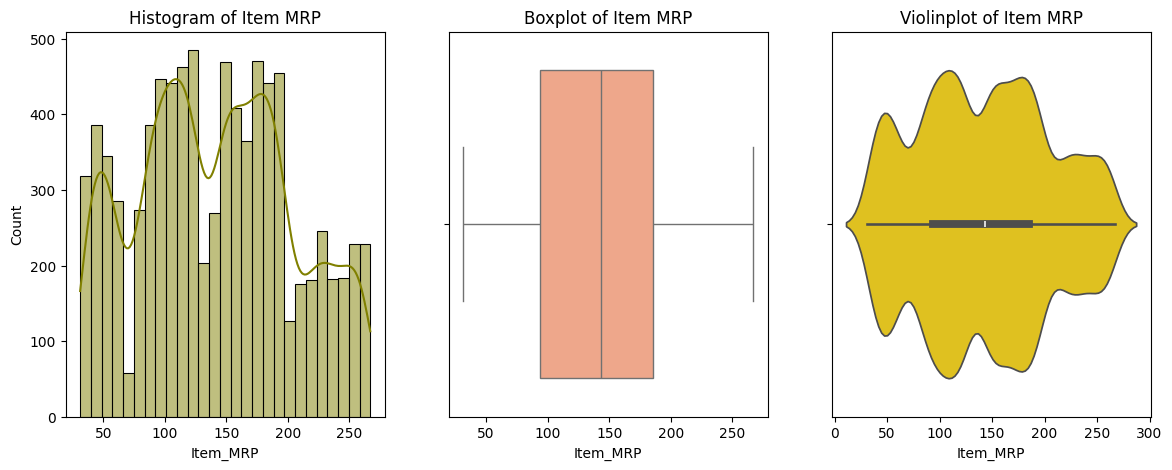

In [12]:
plt.figure(figsize=(14,5))

# Histogram plot for Item MRP
plt.subplot(1,3,1)
sns.histplot(data=df,x='Item_MRP',kde=True,color='olive')
plt.title('Histogram of Item MRP')

# Boxplot for Item MRP
plt.subplot(1,3,2)
sns.boxplot(data=df,x='Item_MRP',color='lightsalmon')
plt.title('Boxplot of Item MRP')

# Violinplot of Item MRP
plt.subplot(1,3,3)
sns.violinplot(x=df['Item_MRP'],color='gold')
plt.title('Violinplot of Item MRP')

Text(0.5, 1.0, 'Violinplot of Outlet Establishment Age')

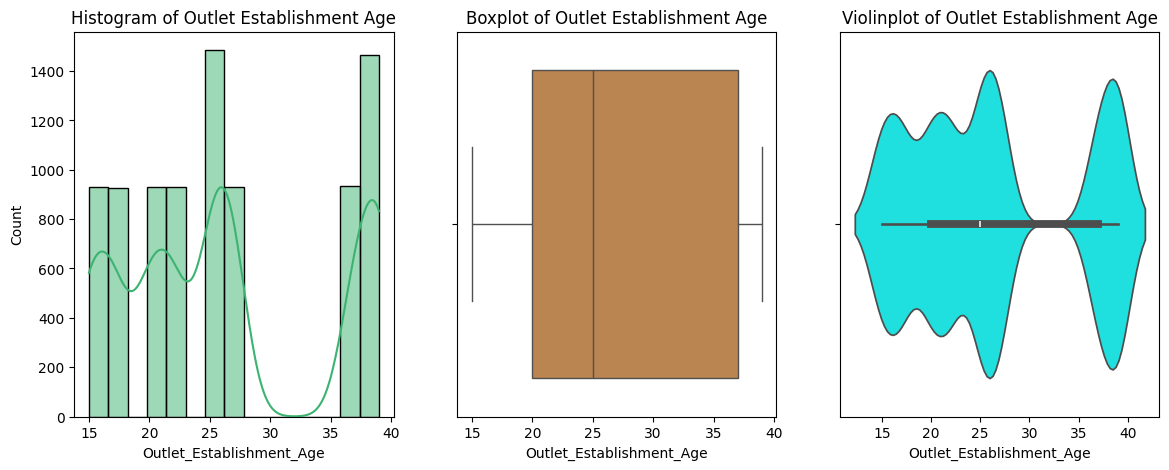

In [13]:
plt.figure(figsize=(14,5))

# Histogram plot for Outlet Establishment Age
plt.subplot(1,3,1)
sns.histplot(data=df,x='Outlet_Establishment_Age',kde=True,color='mediumseagreen')
plt.title('Histogram of Outlet Establishment Age')

# Boxplot for Outlet Establishment Age
plt.subplot(1,3,2)
sns.boxplot(data=df,x='Outlet_Establishment_Age',color='peru')
plt.title('Boxplot of Outlet Establishment Age')

# Violinplot of Outlet Establishment Age
plt.subplot(1,3,3)
sns.violinplot(x=df['Outlet_Establishment_Age'],color='cyan')
plt.title('Violinplot of Outlet Establishment Age')

/var/folders/q0/f4x24yyj5pgfbphby1zl6yxr0000gn/T/ipykernel_3809/3716827625.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Item_Outlet_Sales'],palette='Set2')


Text(0.5, 1.0, 'Violinplot of Item Outlet Sales')

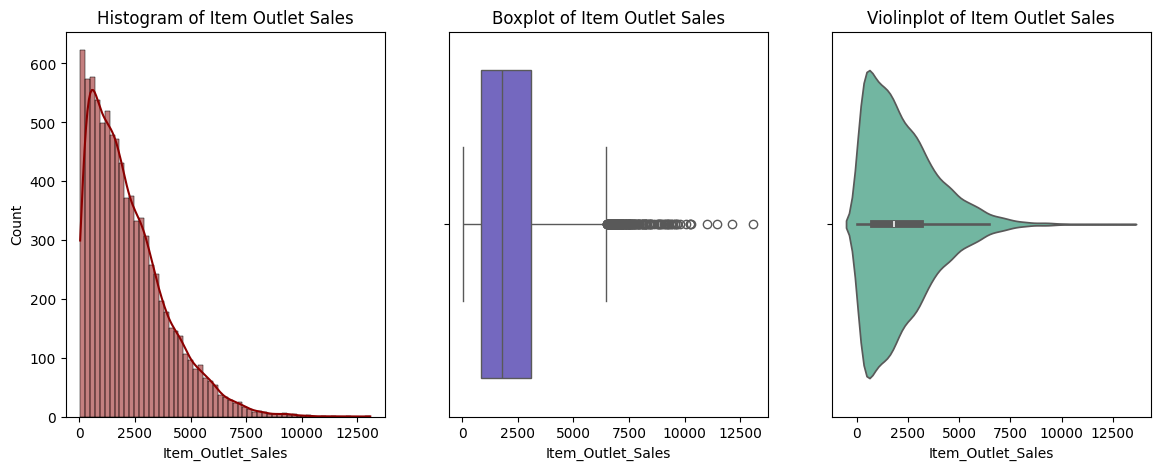

In [14]:
plt.figure(figsize=(14,5))

# Histogram plot for Item Outlet Sales
plt.subplot(1,3,1)
sns.histplot(data=df,x='Item_Outlet_Sales',kde=True,color='darkred')
plt.title('Histogram of Item Outlet Sales')

# Boxplot for Item Weight
plt.subplot(1,3,2)
sns.boxplot(data=df,x='Item_Outlet_Sales',color='slateblue')
plt.title('Boxplot of Item Outlet Sales')

# Violinplot of Item Visibility
plt.subplot(1,3,3)
sns.violinplot(x=df['Item_Outlet_Sales'],palette='Set2')
plt.title('Violinplot of Item Outlet Sales')

#### Univariate Analysis for Categorical Variables

In [15]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Here We can see that there are only two types of classes for Item Fat Content - Low Fat and Regular, but here few redundant classes are present that belong to these two classes.

In [16]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')


In [17]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

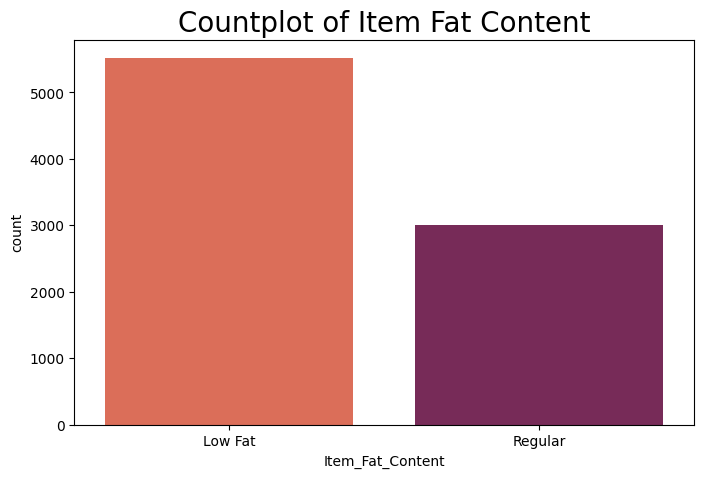

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Item_Fat_Content',hue='Item_Fat_Content',palette='rocket_r')
plt.title('Countplot of Item Fat Content',size=20)
plt.show()

From the countplot of Item Fat Content we can clearly visualize that in the store more number of low fat content items are present than regular fat content items

Text(0.5, 1.0, 'Countplot of Item Type')

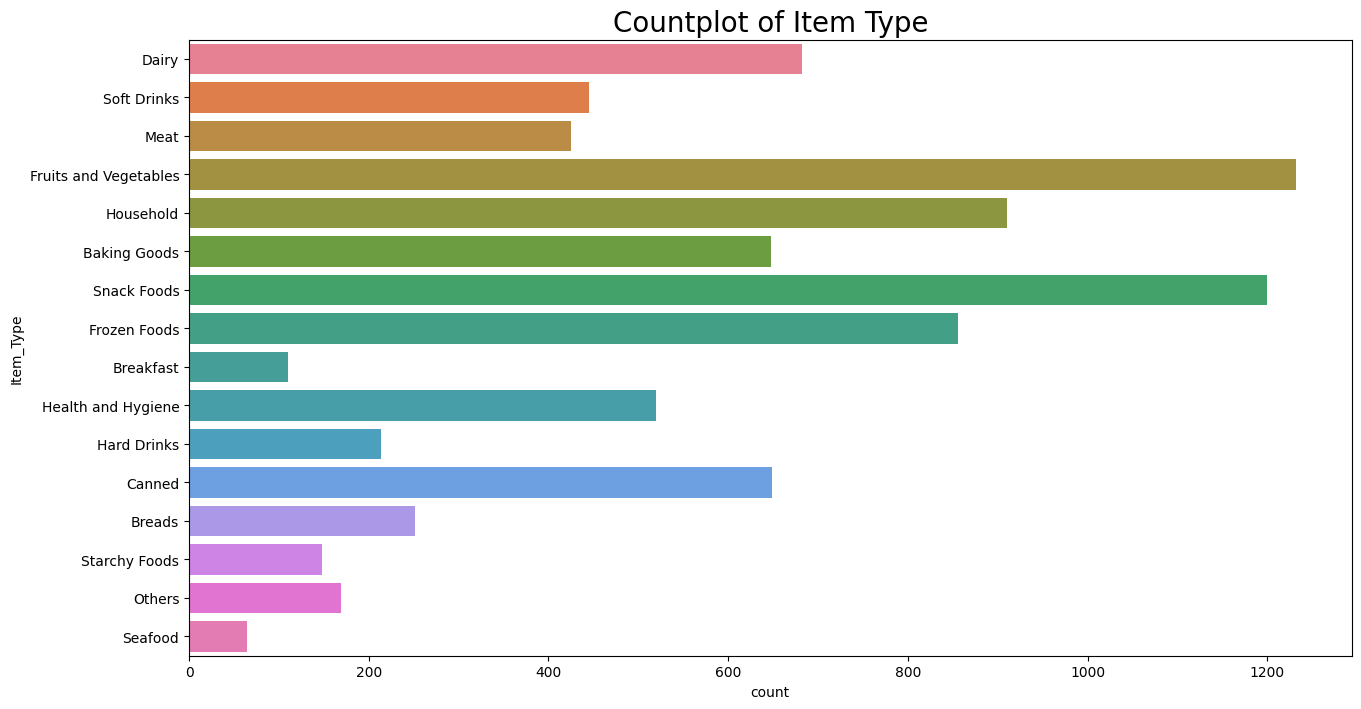

In [19]:
plt.figure(figsize=(15,8))


sns.countplot(data=df,y='Item_Type',hue='Item_Type')
plt.title('Countplot of Item Type',size=20)


From above plot we can see out of all item types fruit and vegetables category is more than the rest of item types and the count of seafood category is less than the rest.

Text(0.5, 1.0, 'Countplot of Outlet Size')

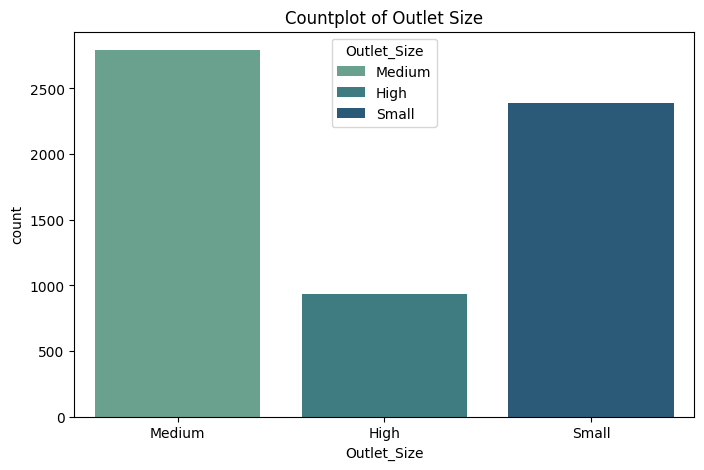

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Outlet_Size',hue='Outlet_Size',palette='crest')
plt.title('Countplot of Outlet Size')

Medium types of outlet size are more in number and small outlet types are less.

Text(0.5, 1.0, 'Countplot of Outlet Location Type')

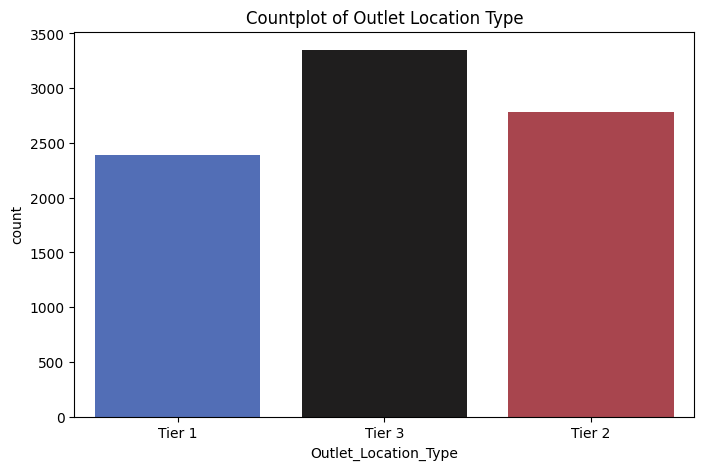

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Outlet_Location_Type',hue='Outlet_Location_Type',palette='icefire')
plt.title('Countplot of Outlet Location Type')

From the above plot we can clearly visualize that in most of the outlets are in Tier 3 cities and outlets are less in Tier 1 cities.

Text(0.5, 1.0, 'Countplot of Outlet Type')

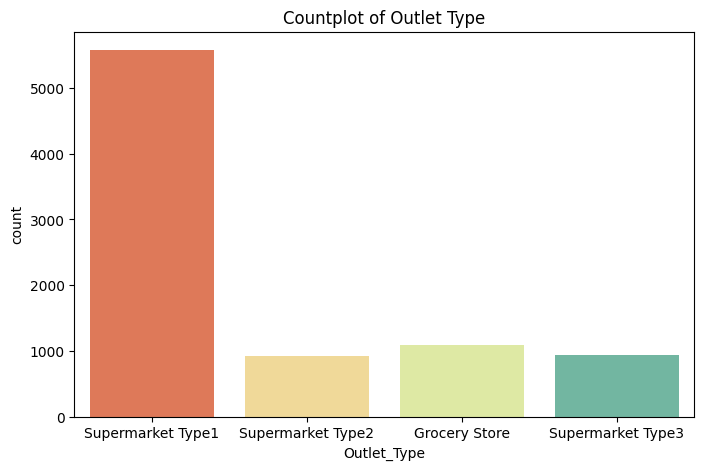

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Outlet_Type',hue='Outlet_Type',palette='Spectral')
plt.title('Countplot of Outlet Type')

Out of all the outlets Supermarket type outlets are more in number than the rest

#### Bivariate Analysis

In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishment_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,37


In [24]:
corr=df[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','Outlet_Establishment_Age']].corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Establishment_Age
Item_Weight,1.000000,-0.014048,0.027141,0.014123,0.011588
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.027141,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000,0.049135
Outlet_Establishment_Age,0.011588,0.074834,-0.005020,0.049135,1.000000


Text(0.5, 1.0, 'Correlations between Numerical Variables')

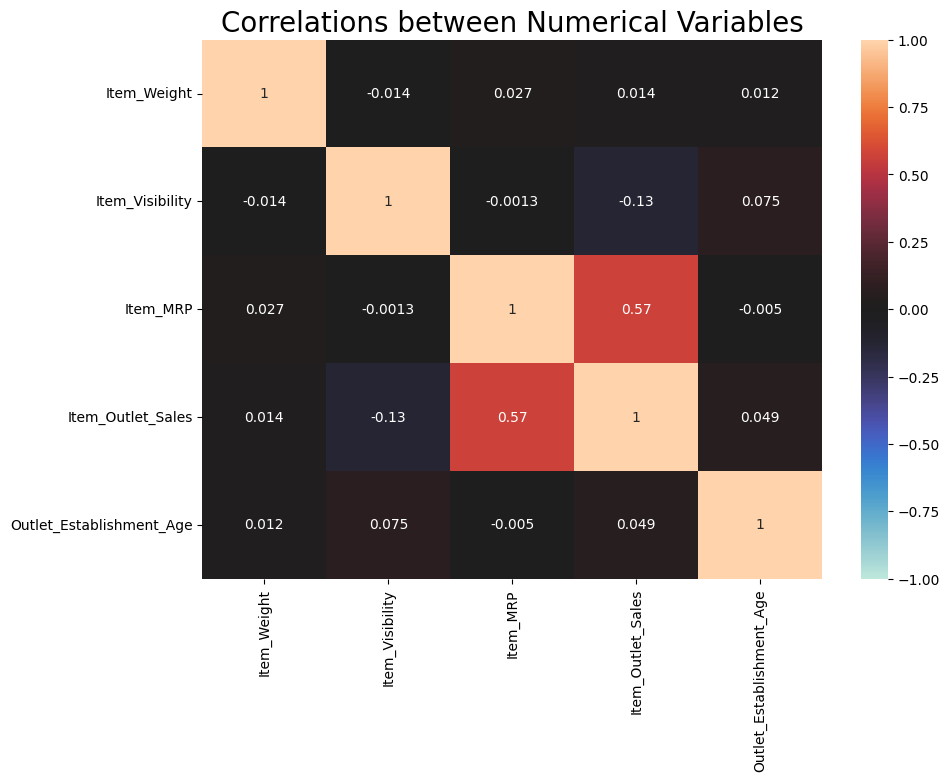

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,vmax=1,vmin=-1,center=0)
plt.title('Correlations between Numerical Variables',size=20)

From the above plot we can see there are no such high correlations among attributes so there is no multicolinearity

Text(0.5, 1.0, 'Boxplot of Item Weight Vs Item Type')

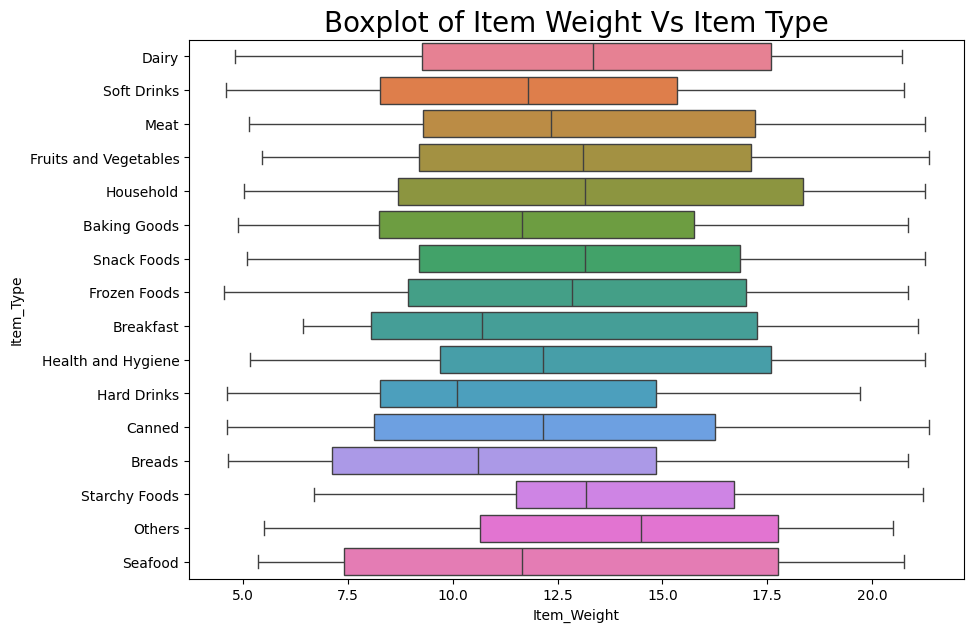

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,y='Item_Type',x='Item_Weight',hue='Item_Type')
plt.title('Boxplot of Item Weight Vs Item Type',size=20)

Average Weights of different types of foods are not differing much

Text(0.5, 1.0, 'Boxplot of Item Visibility Vs Item Type')

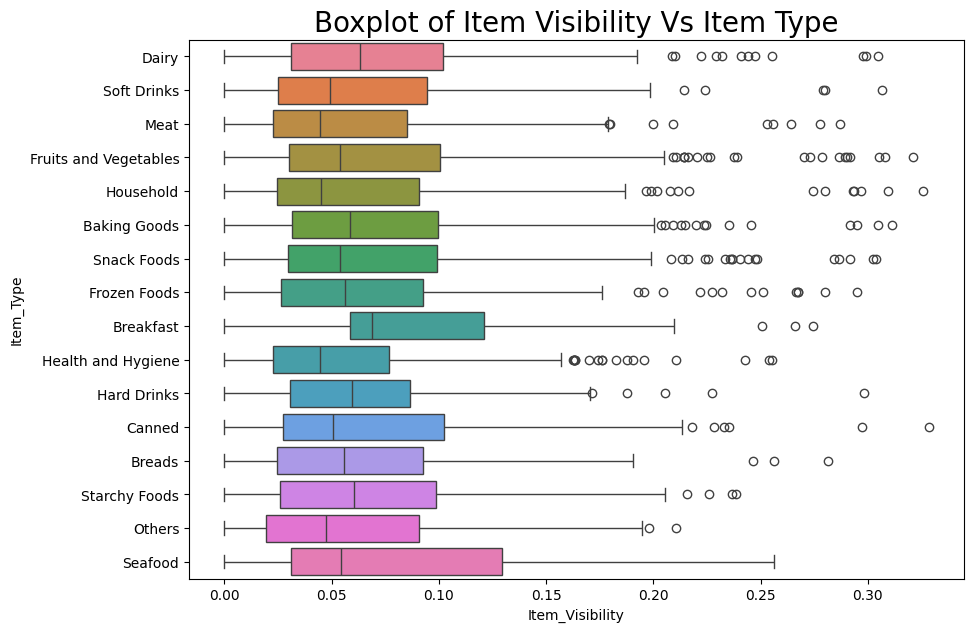

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,y='Item_Type',x='Item_Visibility',hue='Item_Type')
plt.title('Boxplot of Item Visibility Vs Item Type',size=20)

The average Item Visibility for all the product type is not differing much

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

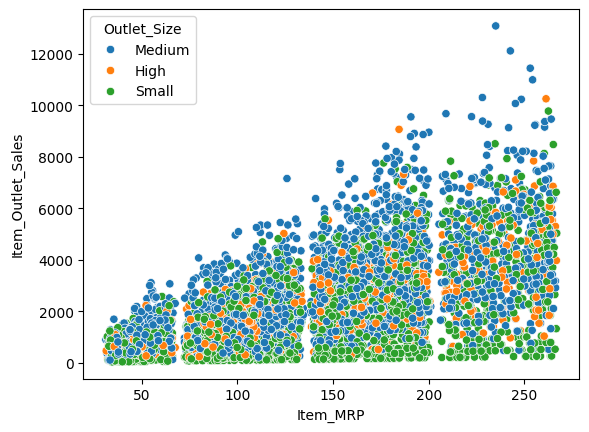

In [28]:
sns.scatterplot(data=df,x='Item_MRP',y='Item_Outlet_Sales',hue='Outlet_Size')

There is a positive correlation between Item MRP and Item Outlet Sales. As the Item Outlet Sales increases as the Item MRP increases.

In [29]:
Tier1=round(df.loc[df['Outlet_Location_Type']=='Tier 1','Item_Outlet_Sales'].mean())
Tier2=round(df.loc[df['Outlet_Location_Type']=='Tier 2','Item_Outlet_Sales'].mean())
Tier3=round(df.loc[df['Outlet_Location_Type']=='Tier 3','Item_Outlet_Sales'].mean())

Text(0, 0.5, 'Average Item Outlet Sales')

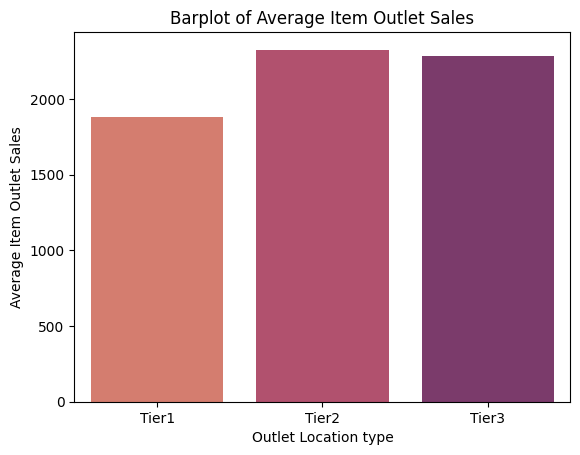

In [30]:
sns.barplot(x=['Tier1','Tier2','Tier3'],y=[Tier1,Tier2,Tier3],hue=['Tier1','Tier2','Tier3'],palette="flare")
plt.title('Barplot of Average Item Outlet Sales')
plt.xlabel('Outlet Location type')
plt.ylabel('Average Item Outlet Sales')

Average Item outlet sales is much similar in Tier 2 and Tier 3 cities and more than Tier 1 cities

Text(0.5, 1.0, 'Countplot of Outlet Size based on Outlet Location Type')

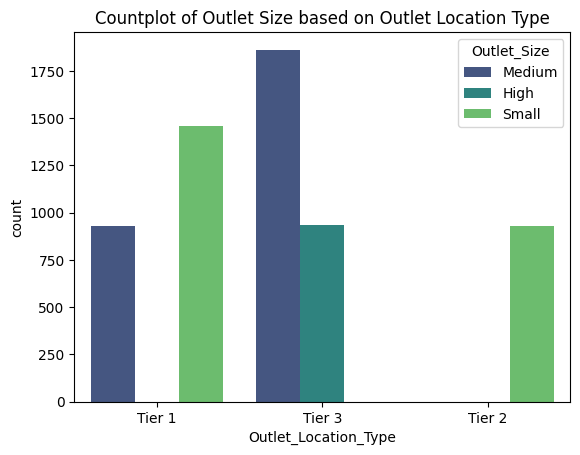

In [31]:
sns.countplot(data=df,x='Outlet_Location_Type',hue='Outlet_Size',palette='viridis')
plt.title('Countplot of Outlet Size based on Outlet Location Type')

1. Most of the Large and medium outlets are present in Tier3 cities.
2. Most of the small outlets are present in Tier1 cities.
3. No Large and Medium outlets are present in Tier2 cities.

Text(0.5, 1.0, 'Countplot of Outlet Type based on Outlet Size')

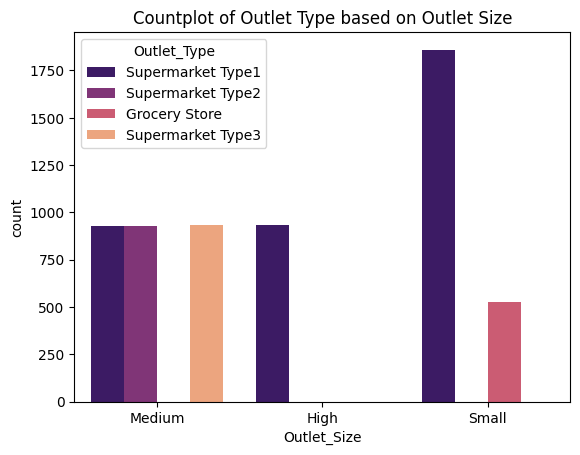

In [32]:
sns.countplot(data=df,x='Outlet_Size',hue='Outlet_Type',palette='magma')
plt.title('Countplot of Outlet Type based on Outlet Size')

1. Most of the Supermarket Type 1 and Grocery store belongs to small outlet
2. Supermarket Type 2 and Supermarket Type 3 belongs to Medium Size outlet
3. Few Supermarket Type 1 store belong to high outlet

Text(0.5, 1.0, 'Countplot of Outlet Type based on Outlet Location Type')

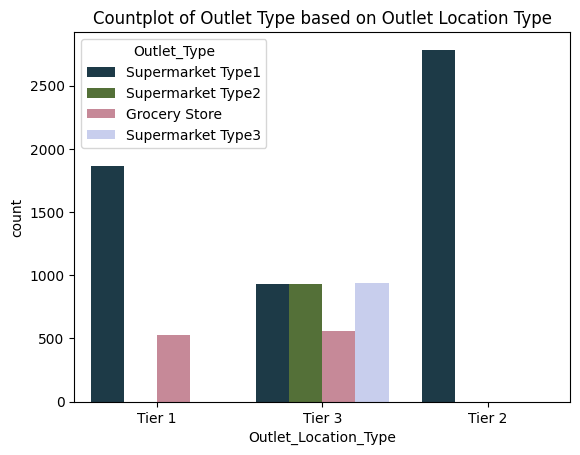

In [33]:
sns.countplot(data=df,x='Outlet_Location_Type',hue='Outlet_Type',palette='cubehelix')
plt.title('Countplot of Outlet Type based on Outlet Location Type')

1. Most of the Supermarket Type 1 store present in Tier1 cities.
2. In Tier 3 cities all types of outlets are present.
3. In Tier 1 cities only Supermarket Type 1 and Grocery Stores are present.

Text(0.5, 1.0, 'Barplot of Outlet Type Vs Item Visibility')

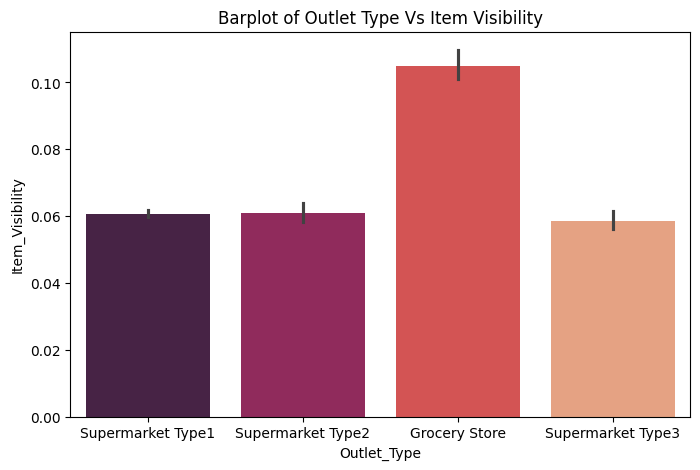

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Outlet_Type',y='Item_Visibility',hue='Outlet_Type',palette='rocket')
plt.title('Barplot of Outlet Type Vs Item Visibility')

Most of the Items are present in Grocery Stores

Text(0.5, 1.0, 'Barplot of Outlet type Vs Item Outlet Sales')

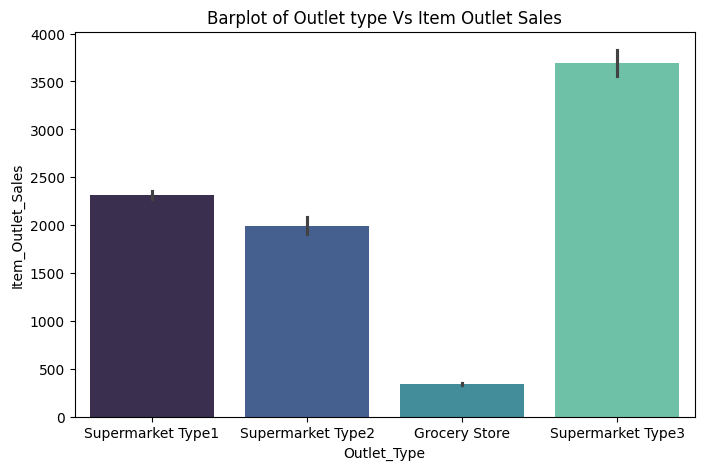

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Type',palette='mako')
plt.title("Barplot of Outlet type Vs Item Outlet Sales")

Most Item outlet sales are in Supermarket Type 3 stores and less in Grocery Store

### **Feature Engineering**

### Outlier Removal

Through Boxplot of Item Visibility it has been seen that outliers are present in Item Visibility

In [36]:
Q1,Q3=df['Item_Visibility'].quantile([.25,.75])

print(f"First Quartile Value {Q1}")
print(f"Third Quartile value {Q3}")

First Quartile Value 0.0269894775
Third Quartile value 0.0945852925


In [37]:
## calculating Interquartile Range 
IQR=(Q3-Q1)
print(f"Interquartile Range value {IQR}")

Interquartile Range value 0.067595815


In [38]:
lower=Q1-(1.5)*(IQR)
upper=Q3+(1.5)*(IQR)

print(f"Lower Fence Value {lower}")
print(f"Upper Fence Value {upper}")

Lower Fence Value -0.07440424500000001
Upper Fence Value 0.195979015


Now We will consider those values as outliers and remove those values which are lower than lower fence and greater than upper fence

In [39]:
df.loc[df['Item_Visibility']>lower,['Item_Visibility']]


,Item_Visibility
0,0.016047
1,0.019278
2,0.016760
3,0.000000
4,0.000000
...,...
8518,0.056783
8519,0.046982
8520,0.035186
8521,0.145221


In [40]:
df_new=df.loc[df['Item_Visibility']<upper]
df_new.shape

(8379, 12)

### Missing Value Imputation

In [41]:
df_new.isnull().sum()

Item_Identifier                 0
Item_Weight                  1386
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2343
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Establishment_Age        0
dtype: int64

For Item Weight we will impute average value of that particular Item category in place of missing value

In [42]:
item_type_identifier=df_new['Item_Type'].unique()

In [43]:
item_type_identifier

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [44]:
for item in item_type_identifier:
    mean=df_new.loc[df_new['Item_Type']==item,'Item_Weight'].dropna().mean()
    df_new.loc[df_new['Item_Type']==item,'Item_Weight']=df_new.loc[df_new['Item_Type']==item,'Item_Weight'].fillna(mean)


In [45]:
df_new['Item_Weight'].isnull().sum()

np.int64(0)

In [46]:
df_new.shape

(8379, 12)

For Outlet Size we will impute values based on the barplot between Outlet Size and Outlet Type
1. If the outlet type is Supermarket Type1 we will impute small in Outlet Size
2. If the outlet type is Supermarket Type2 we will impute medium in Outlet Size
3. If the outlet type is Supermarket Type3 we will impute medium in Outlet Size
4. If the outlet type is Grocery Store we will impute small in Outlet Size

In [47]:
df_new['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2311
High       932
Name: count, dtype: int64

In [48]:
df_new.loc[df_new['Outlet_Type']=='Supermarket Type1','Outlet_Size']=df_new.loc[df_new['Outlet_Type']=='Supermarket Type1','Outlet_Size'].fillna("Small")
df_new.loc[df_new['Outlet_Type']=='Supermarket Type2','Outlet_Size']=df_new.loc[df_new['Outlet_Type']=='Supermarket Type2','Outlet_Size'].fillna("Medium")
df_new.loc[df_new['Outlet_Type']=='Supermarket Type3','Outlet_Size']=df_new.loc[df_new['Outlet_Type']=='Supermarket Type3','Outlet_Size'].fillna("Medium")
df_new.loc[df_new['Outlet_Type']=='Grocery Store','Outlet_Size']=df_new.loc[df_new['Outlet_Type']=='Grocery Store','Outlet_Size'].fillna("Small")

In [49]:
df_new.shape

(8379, 12)

In [50]:
df_new.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Establishment_Age     0
dtype: int64

We have successfully imputed all the missing values

Now We have few records with 0 Item Visibility, that means that particular item is not present in stores. So here we replace all 0 values with average Item visibility of that particular Outlet type.

In [51]:
outlet_type_identifier=df_new['Outlet_Type'].unique()
outlet_type_identifier

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [52]:
for outlet_type in outlet_type_identifier:
    mean_val=df_new.loc[(df_new['Outlet_Type']==outlet_type),'Item_Visibility'].mean()
    df_new.loc[(df_new['Outlet_Type']==outlet_type)&(df_new['Item_Visibility']==0),'Item_Visibility']=df_new.loc[(df_new['Outlet_Type']==outlet_type)&(df_new['Item_Visibility']==0),'Item_Visibility'].replace(0,mean_val)

In [53]:
df_new.shape

(8379, 12)

In [54]:
df_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishment_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.083401,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.060723,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,37


In [55]:
#df_new.to_csv('preprocessed.csv',index=False)

### Encoding Categorical Variable

Now we have to convert all our categorical variable into numerical variable with the help of One Hot Encoding, Label Encoding and Ordinal Encoding

In [56]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder


First convert Item Fat Content

In [57]:
encoder=OneHotEncoder()

encoded=encoder.fit_transform(df_new[['Item_Fat_Content','Outlet_Type','Item_Type']]).toarray()

In [58]:
df_new.shape

(8379, 12)

In [59]:
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoder_df

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8375,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8376,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8377,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
df_new.reset_index(drop=True, inplace=True)
encoder_df.reset_index(drop=True, inplace=True)

In [61]:
df_new.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Establishment_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.083401,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.060723,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,37


In [62]:
df_new=df_new.join(encoder_df)

In [63]:
df_new=df_new.drop(['Item_Identifier','Item_Fat_Content','Outlet_Type','Item_Type'],axis=1)
df_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Establishment_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,Medium,Tier 1,3735.1380,25,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.92,0.019278,48.2692,2009,Medium,Tier 3,443.4228,15,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,1999,Medium,Tier 1,2097.2700,25,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.20,0.083401,182.0950,1998,Small,Tier 3,732.3800,26,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,0.060723,53.8614,1987,High,Tier 3,994.7052,37,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
ordinal_encoder1=OrdinalEncoder(categories=[['Small','Medium','High']])

ordinal_encoded1=ordinal_encoder1.fit_transform(df_new[['Outlet_Size']])

In [65]:
ordinal_encoded1

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [66]:
ordinal_df1=pd.DataFrame(ordinal_encoded1,columns=['Outlet Size'])

In [67]:
ordinal_df1.reset_index(drop=True, inplace=True)

In [68]:
df_new=df_new.join(ordinal_df1)
df_new

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Establishment_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet Size
0,9.300,0.016047,249.8092,1999,Medium,Tier 1,3735.1380,25,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.920,0.019278,48.2692,2009,Medium,Tier 3,443.4228,15,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,17.500,0.016760,141.6180,1999,Medium,Tier 1,2097.2700,25,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,19.200,0.083401,182.0950,1998,Small,Tier 3,732.3800,26,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.930,0.060723,53.8614,1987,High,Tier 3,994.7052,37,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,6.865,0.056783,214.5218,1987,High,Tier 3,2778.3834,37,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
8375,8.380,0.046982,108.1570,2002,Small,Tier 2,549.2850,22,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8376,10.600,0.035186,85.1224,2004,Small,Tier 2,1193.1136,20,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8377,7.210,0.145221,103.1332,2009,Medium,Tier 3,1845.5976,15,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [69]:
df_new=df_new.drop(columns=['Outlet_Size'])
df_new.shape

(8379, 30)

In [70]:
ordinal_encoder2=OrdinalEncoder(categories=[['Tier 1','Tier 2','Tier 3']])

ordinal_encoded2=ordinal_encoder2.fit_transform(df_new[['Outlet_Location_Type']])

In [71]:
ordinal_df2=pd.DataFrame(ordinal_encoded2,columns=['Outlet Location Type'])

In [72]:
ordinal_df2.reset_index(drop=True, inplace=True)

In [73]:
df_new=df_new.join(ordinal_df2)
df_new

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Establishment_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Type_Grocery Store,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet Size,Outlet Location Type
0,9.300,0.016047,249.8092,1999,Tier 1,3735.1380,25,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.920,0.019278,48.2692,2009,Tier 3,443.4228,15,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
2,17.500,0.016760,141.6180,1999,Tier 1,2097.2700,25,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,19.200,0.083401,182.0950,1998,Tier 3,732.3800,26,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,8.930,0.060723,53.8614,1987,Tier 3,994.7052,37,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,6.865,0.056783,214.5218,1987,Tier 3,2778.3834,37,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0
8375,8.380,0.046982,108.1570,2002,Tier 2,549.2850,22,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8376,10.600,0.035186,85.1224,2004,Tier 2,1193.1136,20,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8377,7.210,0.145221,103.1332,2009,Tier 3,1845.5976,15,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0


In [74]:
df_new=df_new.drop(columns=['Outlet_Location_Type'])

In [75]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8379 entries, 0 to 8378
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8379 non-null   float64
 1   Item_Visibility                  8379 non-null   float64
 2   Item_MRP                         8379 non-null   float64
 3   Outlet_Establishment_Year        8379 non-null   int64  
 4   Item_Outlet_Sales                8379 non-null   float64
 5   Outlet_Establishment_Age         8379 non-null   int64  
 6   Item_Fat_Content_Low Fat         8379 non-null   float64
 7   Item_Fat_Content_Regular         8379 non-null   float64
 8   Outlet_Type_Grocery Store        8379 non-null   float64
 9   Outlet_Type_Supermarket Type1    8379 non-null   float64
 10  Outlet_Type_Supermarket Type2    8379 non-null   float64
 11  Outlet_Type_Supermarket Type3    8379 non-null   float64
 12  Item_Type_Baking Goo

We have successfully converted all the categorical column into numerical column

### **Checking Gaussian Distribution**

We Will check whether the variables following Gaussian Distribution or not

In [76]:
import scipy.stats as stats

<Axes: xlabel='Item_Visibility', ylabel='Count'>

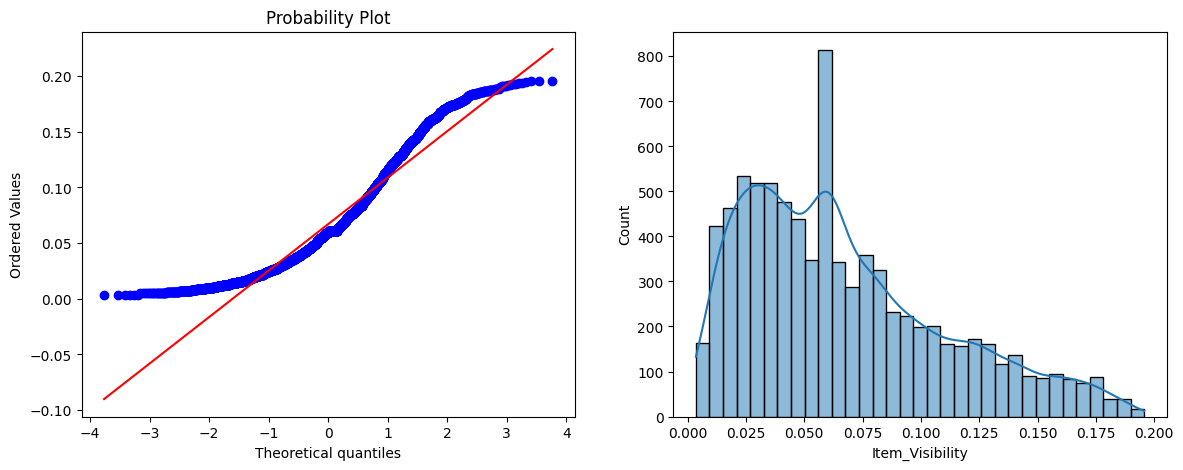

In [77]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
stats.probplot(df_new['Item_Visibility'],plot=plt)
plt.subplot(1,2,2)
sns.histplot(data=df_new,x='Item_Visibility',kde=True)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

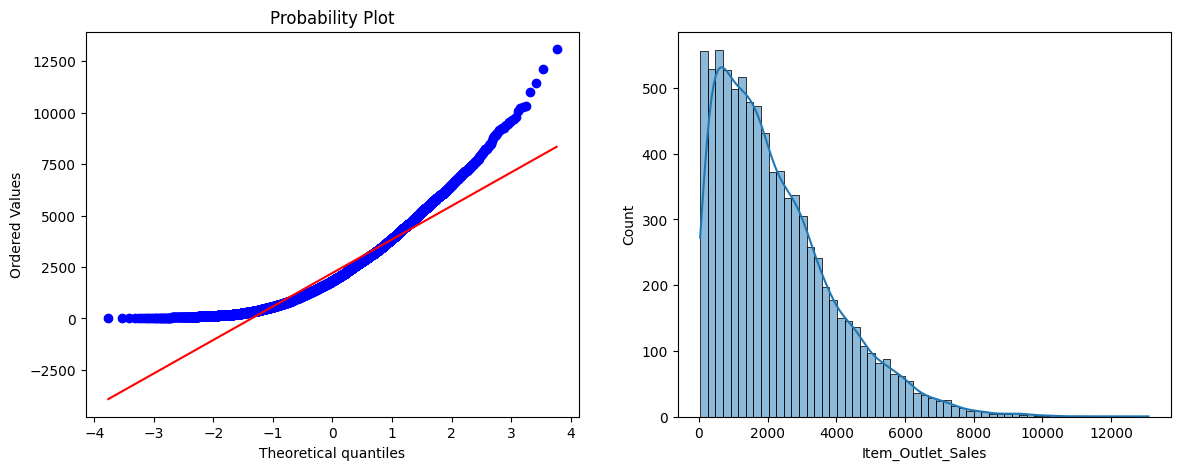

In [78]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
stats.probplot(df_new['Item_Outlet_Sales'],plot=plt)
plt.subplot(1,2,2)
sns.histplot(data=df_new,x='Item_Outlet_Sales',kde=True)

We have clearly seen that two variables Item Visibility and Item Outlet Sales doesn't follow Gaussian Distribution, so We would convert this two variables into Gaussian Distribution.

In [79]:
df_new.skew()

Item_Weight                         0.087792
Item_Visibility                     0.819319
Item_MRP                            0.129015
Outlet_Establishment_Year          -0.414811
Item_Outlet_Sales                   1.170947
Outlet_Establishment_Age            0.414811
Item_Fat_Content_Low Fat           -0.621204
Item_Fat_Content_Regular            0.621204
Outlet_Type_Grocery Store           2.460020
Outlet_Type_Supermarket Type1      -0.702112
Outlet_Type_Supermarket Type2       2.481098
Outlet_Type_Supermarket Type3       2.467647
Item_Type_Baking Goods              3.219328
Item_Type_Breads                    5.552281
Item_Type_Breakfast                 8.722799
Item_Type_Canned                    3.196765
Item_Type_Dairy                     3.097792
Item_Type_Frozen Foods              2.651538
Item_Type_Fruits and Vegetables     2.026372
Item_Type_Hard Drinks               6.062169
Item_Type_Health and Hygiene        3.648117
Item_Type_Household                 2.542310
Item_Type_

In [80]:
def normality(z,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(data=z,x=feature,kde=True)
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=plt)
    plt.show()

((array([-3.76666641, -3.53904214, -3.41395848, ...,  3.41395848,
          3.53904214,  3.76666641]),
  array([0.15290198, 0.15310711, 0.15322893, ..., 0.57995662, 0.58057098,
         0.58060295])),
 (np.float64(0.08974309067579458),
  np.float64(0.386229896020471),
  np.float64(0.994709687881687)))

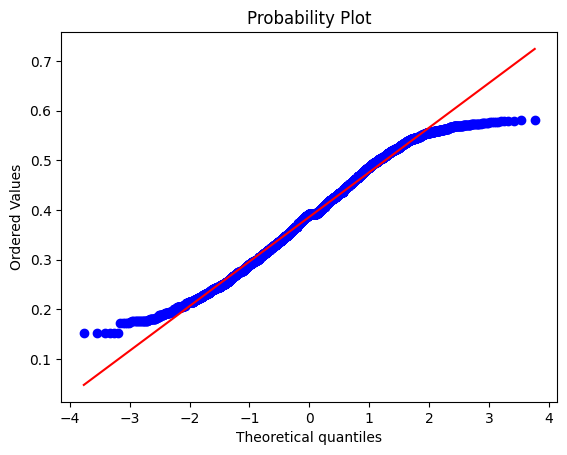

In [81]:

stats.probplot((df_new['Item_Visibility']**(1/3)),plot=plt)

In [82]:
df_new['Item_Visibility']=(df_new['Item_Visibility']**(1/3))

((array([-3.76666641, -3.53904214, -3.41395848, ...,  3.41395848,
          3.53904214,  3.76666641]),
  array([1.54984842, 1.54984842, 1.55368955, ..., 3.21608456, 3.23911895,
         3.27043007])),
 (np.float64(0.2934746265827382),
  np.float64(2.5173106694778493),
  np.float64(0.9869925578993077)))

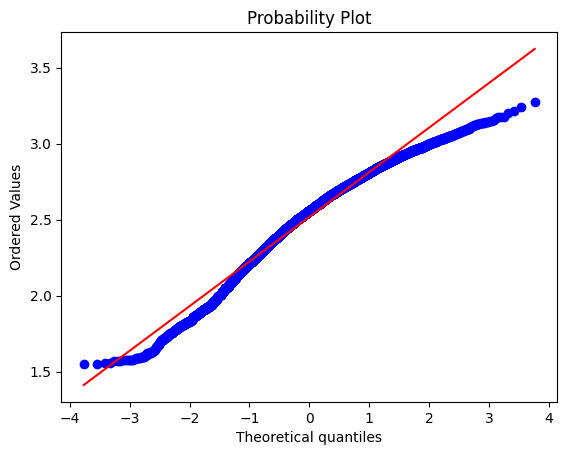

In [83]:
stats.probplot((df_new['Item_Outlet_Sales']**(1/8)),plot=plt)

In [84]:
df_new['Item_Outlet_Sales']=(df_new['Item_Outlet_Sales']**(1/8))

In [85]:
df_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Establishment_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet Size,Outlet Location Type
0,9.30,0.252232,249.8092,1999,2.796007,25,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.92,0.268136,48.2692,2009,2.142162,15,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
2,17.50,0.255913,141.6180,1999,2.601398,25,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,19.20,0.436908,182.0950,1998,2.280825,26,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,8.93,0.393053,53.8614,1987,2.369801,37,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [86]:
df_new.to_csv('Preprocessed_Data.csv')